# Wrangling Big Data

<img src="assets/ml_map.png" width="400px">

[source](http://scikit-learn.org/stable/tutorial/machine_learning_map/)

![](assets/regression_ml_map.png)

## Why Stochastic Gradient Descent? 

Per the `sklearn` documentation:

> The advantages of Stochastic Gradient Descent are:
> - Efficiency.
> - Ease of implementation (lots of opportunities for code tuning).

> The disadvantages of Stochastic Gradient Descent include:
> - SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
> - SGD is sensitive to feature scaling.

Stated even more plainly:

> [`SGDRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) is well suited for regression problems with a large number of training samples (> 10.000), for other problems we recommend [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), or [`ElasticNet`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet).

![](assets/100K.png)

## Out of the Box Comparison

In [2]:

from os import chdir; chdir('/Users/toddmoffett1/DSI/dsi_repo/DSI_SM_3/lib/')
from mglearn.datasets import load_extended_boston

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
%matplotlib inline

### Domain and Dataset

We are interested in comparing the performance of the standard `sklearn` linear regressors out of the box. As such, our "dataset" is the set of the following four linear regressors:

- `sklearn.linear_model.LinearRegression`
- `sklearn.linear_model.Ridge`
- `sklearn.linear_model.Lasso`
- `sklearn.linear_model.SGDRegressor`

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

In order to perform the regression we will be using the "extended boston" dataset provided by the `mglearn` library. This library has 506 instances and 104 features. It is accompanied by a numeric target vector of quantitative values. It is a "canonical" linear regression dataset and is often used for learning linear regression concepts. 

In [4]:
X, y = load_extended_boston()
X.shape, y.shape

((506, 104), (506,))

**Note**: It is considered a best practice when using Stochastic Gradient Descent (and linear models in general) to scale onese data. We will be preprocessing our data using the `StandardScaler` included with `sklearn`.

In [5]:
from sklearn.preprocessing import StandardScaler

### Problem Statement

Given the set of four linear regressors in their "out-of-the-box" state i.e. default, with no tuning parameters applied, we wish to see how these perform when applied to the same dataset. 

### Solution Statement

As this is an exploratory problem, our solution will take the form of scores for each model presented in a plot. 

### Metric

N/A

### Benchmark

N/A

### Code Template

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LR = LinearRegression()
LR.fit(X_train, y_train)
print LR.score(X_train, y_train)
print LR.score(X_test, y_test)

0.952352643686
0.605775489294


In [7]:
def fit_and_score_linear_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)
    return {'model': model, 'train_score' : model.score(X_train, y_train), 'test_score': model.score(X_test, y_test)}

In [8]:
fit_and_score_linear_model(LinearRegression(), X, y)

{'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'test_score': 0.60577548929355363,
 'train_score': 0.95235264368642381}

In [9]:
fit_and_score_linear_model(Ridge(), X, y)

{'model': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 'test_score': 0.78350692384158693,
 'train_score': 0.93829533097778084}

In [22]:
fit_and_score_linear_model(Lasso(), X, y)

{'model': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 'test_score': 0.6745466746355937,
 'train_score': 0.78765800246238171}

In [26]:
fit_and_score_linear_model(SGDRegressor(), X, y)

{'model': SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
        fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
        loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
        random_state=None, shuffle=True, verbose=0, warm_start=False),
 'test_score': 0.73467329592986585,
 'train_score': 0.87191891445668523}

In [34]:
fits = [fit_and_score_linear_model(LinearRegression(), X, y),
        fit_and_score_linear_model(Ridge(), X, y),
        fit_and_score_linear_model(Lasso(), X, y),
        fit_and_score_linear_model(SGDRegressor(), X, y)]

fits = pd.DataFrame(fits)
fits

,model,test_score,train_score
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.605775,0.952353
1,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.783507,0.938295
2,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.674547,0.787658
3,"SGDRegressor(alpha=0.0001, average=False, epsi...",0.740266,0.845047


### Pandas Munging to make Seaborn Happy

In [32]:
for_plot = pd.concat([fits[['model','test_score']],fits[['model','train_score']]])
for_plot['model'] = for_plot['model'].astype(str).str.extract('(.+)\(', expand=False)
for_plot['type'] = ['test']*4+['train']*4
for_plot['train_score'].fillna(for_plot['test_score'], inplace=True)
for_plot.drop('test_score', inplace=True, axis=1)
for_plot.columns = ['model', 'score', 'type']

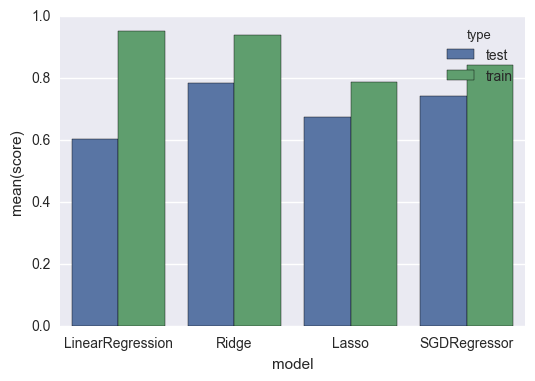

In [35]:
barplot = sns.barplot(x='model', y='score', hue='type', data=for_plot)

---

### Domain and Dataset

We are interested in comparing the timing performance of three standard `sklearn` linear regressors out of the box using datasets of different sizes. As such, our "dataset" is the set of the following three linear regressors:

- `sklearn.linear_model.LinearRegression`
- `sklearn.linear_model.Ridge`
- `sklearn.linear_model.SGDRegressor`


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

In order to perform the regression we will be using the `make_regression` function built into provided by the `sklearn.datasets` library. This functions constructs a regression problem with a given number of instances and a given number of features features. It is accompanied by a numeric target vector of quantitative values.

In [39]:
from time import time
from sklearn import datasets
X, y = datasets.make_regression(int(1e4), 
                                n_features=1000, 
                                noise=50.0)

In [40]:
X.shape

(10000, 1000)

**Note**: It is considered a best practice when using Stochastic Gradient Descent (and linear models in general) to scale onese data. We will be preprocessing our data using the `StandardScaler` included with `sklearn`.

In [42]:
from sklearn.preprocessing import StandardScaler

### Problem Statement

Given the set of three linear regressors in their "out-of-the-box" state i.e. default, with no tuning parameters applied, we wish to see how these perform when applied to the regression datasets of varying sizes. 

### Solution Statement

As this is an exploratory problem, our solution will take the form of scores for each model presented in a plot. 

### Metric

N/A

### Benchmark

N/A

### Code Template

In [44]:
start = time()
fit = fit_and_score_linear_model(LinearRegression(), X, y)
end = time()
fit['test_score'], end - start

(0.94243584894315446, 0.7349610328674316)

In [54]:
def time_train_score_for_LM_of_size_n(model, n):
    X, y = datasets.make_regression(int(n),
                                    n_features=1000, 
                                    noise=50.0)
    start = time()
    fit = fit_and_score_linear_model(model, X, y)
    end = time()
    return {'score': fit['test_score'], 'time': end - start}

In [53]:
1e2 * 1000

100000.0

In [55]:
results = []
for n in [1e2, 1e3, 1e4]:
    res_dict = time_train_score_for_LM_of_size_n(LinearRegression(), n)
    res_dict['type'] = 'LR'
    res_dict['n'] = n
    results.append(res_dict)
    
    res_dict = time_train_score_for_LM_of_size_n(SGDRegressor(), n)
    res_dict['type'] = 'SGD'
    res_dict['n'] = n
    results.append(res_dict)
    
    res_dict = time_train_score_for_LM_of_size_n(Ridge(), n)
    res_dict['type'] = 'Ridge'
    res_dict['n'] = n
    results.append(res_dict)
    

,n,score,time,type
0,100.0,0.154189,0.010416,LR
1,100.0,-440.004466,0.003270,SGD
2,100.0,0.054034,0.003842,Ridge
3,1000.0,0.575438,0.145008,LR
4,1000.0,0.216219,0.022699,SGD
5,1000.0,0.484880,0.035963,Ridge
6,10000.0,0.834147,0.763192,LR
7,10000.0,0.892524,0.243768,SGD
8,10000.0,0.883524,0.285389,Ridge


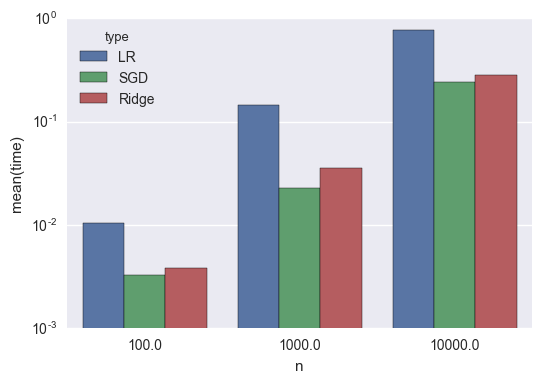

In [57]:
results_df = pd.DataFrame(results)
sns.barplot(x='n', y='time', hue='type', data=results_df)
plt.yscale('log')
results_df

### Tuning Our Linear Models

### Domain and Dataset

We are interested in comparing the performance of two standard `sklearn` linear regressors after they have been tuned. As such, our "dataset" is the set of the following two linear regressors:

- `sklearn.linear_model.Ridge`
- `sklearn.linear_model.SGDRegressor`


In [ ]:
from sklearn.linear_model import Ridge, SGDRegressor

In order to perform the regression we will be using the `make_regression` function built into provided by the `sklearn.datasets` library. This functions constructs a regression problem with a given number of instances and a given number of features features. It is accompanied by a numeric target vector of quantitative values.

We will use it to construct a regression problem with 1000000 instances and 1000 features.

In [58]:
from time import time
from sklearn import datasets
X, y = datasets.make_regression(int(1e5), 
                                n_features=1000, 
                                noise=75.0)

In [59]:
X.shape

(100000, 1000)

**Note**: It is considered a best practice when using Stochastic Gradient Descent (and linear models in general) to scale onese data. We will be preprocessing our data using the `StandardScaler` included with `sklearn`.

In [ ]:
from sklearn.preprocessing import StandardScaler

### Problem Statement

Given the set of two linear regressors, we wish to see how these perform when tuned for performance against a large dataset. 

### Solution Statement

As this is an exploratory problem, our solution will take the form of scores for each model presented in a plot. 

### Metric

We will use the default regression scorer, the $R^2$ and its performance against the test set. We will also be looking at time. 

### Benchmark

We will use the performance of the default `Ridge` regression as our benchmark performance and model.

In [60]:
start = time()
fit = fit_and_score_linear_model(Ridge(), X, y)
end = time()
print end-start, fit['test_score']

4.0941119194 0.770876674558


We have a benchmark time of 9.986 seconds and a benchmark $R^2$ score of $0.886262$.

### Tune the Ridge Regression


In [61]:
ridge_results = []
alphas = [0.001, 0.01, 0.1, 1.0, 2, 5, 10]
for alpha in alphas:
    print alpha
    start = time()
    fit = fit_and_score_linear_model(Ridge(alpha=alpha), X, y)
    end = time()
    results.append({'alpha': alpha,
                    'type' : 'ridge', 
                   'score' : fit['test_score'],
                   'time' : end-start})
results_df = pd.DataFrame(results)
results_df    

0.001
0.01
0.1
1.0
2
5
10


,alpha,n,score,time,type
0,NaN,100.0,0.154189,0.010416,LR
1,NaN,100.0,-440.004466,0.003270,SGD
2,NaN,100.0,0.054034,0.003842,Ridge
3,NaN,1000.0,0.575438,0.145008,LR
4,NaN,1000.0,0.216219,0.022699,SGD
5,NaN,1000.0,0.484880,0.035963,Ridge
6,NaN,10000.0,0.834147,0.763192,LR
7,NaN,10000.0,0.892524,0.243768,SGD
8,NaN,10000.0,0.883524,0.285389,Ridge
9,0.001,NaN,0.770877,3.847651,ridge


In [62]:
ridge_results_df = pd.DataFrame(results)
ridge_results_df

,alpha,n,score,time,type
0,NaN,100.0,0.154189,0.010416,LR
1,NaN,100.0,-440.004466,0.003270,SGD
2,NaN,100.0,0.054034,0.003842,Ridge
3,NaN,1000.0,0.575438,0.145008,LR
4,NaN,1000.0,0.216219,0.022699,SGD
5,NaN,1000.0,0.484880,0.035963,Ridge
6,NaN,10000.0,0.834147,0.763192,LR
7,NaN,10000.0,0.892524,0.243768,SGD
8,NaN,10000.0,0.883524,0.285389,Ridge
9,0.001,NaN,0.770877,3.847651,ridge


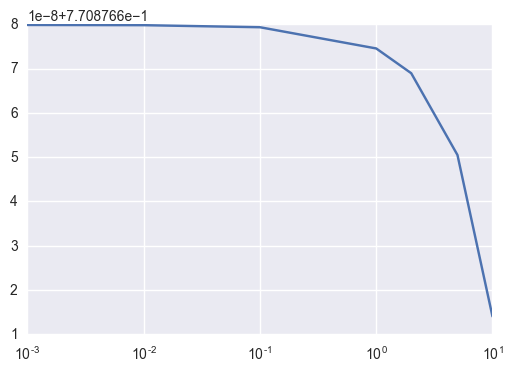

In [63]:
ridge_results_df = pd.DataFrame(results)
plt.plot(ridge_results_df['alpha'],
         ridge_results_df['score'])
plt.xscale('log')

In [64]:
sgd_results = []
alphas = [0.001, 0.01, 0.1, 1.0, 2, 5, 10]
for alpha in alphas:
    print alpha
    start = time()
    fit = fit_and_score_linear_model(
                SGDRegressor(alpha=alpha), X, y)
    end = time()
    sgd_results.append({'alpha': alpha,
                        'type' : 'SGD', 
                        'score' : fit['test_score'],
                        'time' : end-start})
    
sgd_results_df = pd.DataFrame(sgd_results)
sgd_results_df    

0.001
0.01
0.1
1.0
2
5
10


,alpha,score,time,type
0,0.001,0.721908,3.225563,SGD
1,0.010,0.716477,3.248712,SGD
2,0.100,0.715227,3.278621,SGD
3,1.000,0.533443,3.286664,SGD
4,2.000,0.389610,3.271113,SGD
5,5.000,0.210727,3.389984,SGD
6,10.000,0.122278,3.375272,SGD


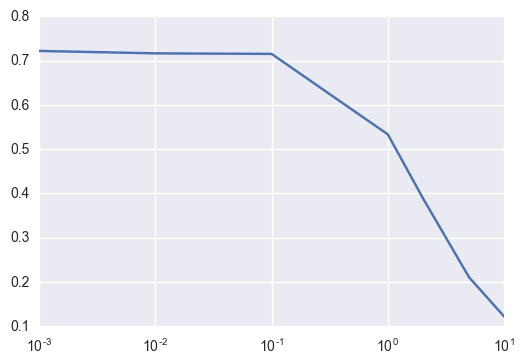

In [65]:
plt.plot(sgd_results_df['alpha'],
         sgd_results_df['score'])
plt.xscale('log')

In [68]:
sgd_results_2 = []

fit = fit_and_score_linear_model(
                    SGDRegressor(alpha=.001,
                                 warm_start=True), X, y)
sgd_results_2.append({'alpha': alpha,
                    'type' : 'SGD', 
                    'score' : fit['test_score'],
                    'time' : end-start})


for _ in range(25):
    fit = fit_and_score_linear_model(fit['model'], X, y)
    
    sgd_results_2.append({'alpha': alpha,
                        'type' : 'SGD', 
                        'score' : fit['test_score'],
                        'time' : end-start})
    
sgd_results_2_df = pd.DataFrame(sgd_results_2)
sgd_results_2_df       

,alpha,score,time,type
0,10,0.720828,3.375272,SGD
1,10,0.717493,3.375272,SGD
2,10,0.715353,3.375272,SGD
3,10,0.716583,3.375272,SGD
4,10,0.719870,3.375272,SGD
5,10,0.716076,3.375272,SGD
6,10,0.718561,3.375272,SGD
7,10,0.718625,3.375272,SGD
8,10,0.715675,3.375272,SGD
9,10,0.717513,3.375272,SGD


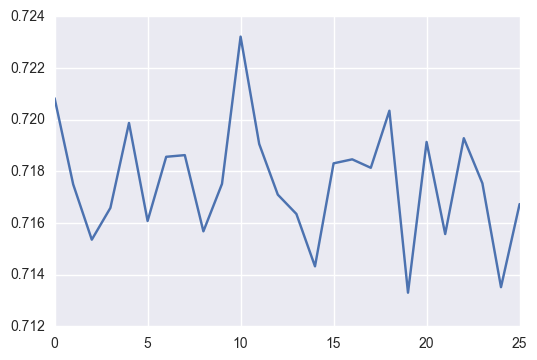

In [69]:
plt.plot(range(len(sgd_results_2_df['score'])),
         sgd_results_2_df['score'])